# Exploring Data

### Introduction

Now that we know how to work with a dataframe and select individual columns, it's time for us to see if we can begin to understand our data.

> ** As Data Scientists, we often don't know where our data comes from.

> For example, is it all of the movies, all of the movies from a certain time period?  This will have an impact on how we interpret our results. 

### Exploring a DataFrame

For example, let's start with dataframe of the movies data.  The first thing we'll do is load up the data, and then perhaps look at the columns available.

In [1]:
import pandas as pd
movies_df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bechdel/movies.csv')

In [9]:
movies_df.columns

Index(['year', 'imdb', 'title', 'test', 'clean_test', 'binary', 'budget',
       'domgross', 'intgross', 'code', 'budget_2013$', 'domgross_2013$',
       'intgross_2013$', 'period code', 'decade code'],
      dtype='object')

It may be difficult to understand what information is in these columns so perhaps we want to look at some of the initial values, which we can do with the `head` or `tail` methods.

In [57]:
movies_df.head(2)

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0


In [56]:
movies_df.tail(2)

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
1792,1971,tt0067992,Willy Wonka &amp; the Chocolate Factory,men-disagree,men,FAIL,3000000,4000000.0,4000000.0,1971FAIL,17263543,23018057.0,23018057.0,NaN,NaN
1793,1970,tt0065466,Beyond the Valley of the Dolls,ok,ok,PASS,1000000,9000000.0,9000000.0,1970PASS,5997631,53978683.0,53978683.0,NaN,NaN


Now if we want to get an overview of the data in each of the columns, we can do so with the describe method.

In [8]:
movies_df.describe()

,year,budget,domgross,intgross,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
count,1794.000000,1.794000e+03,1.777000e+03,1.783000e+03,1.794000e+03,1.776000e+03,1.783000e+03,1615.000000,1615.000000
mean,2002.552397,4.482646e+07,6.913205e+07,1.503857e+08,5.546461e+07,9.517478e+07,1.978380e+08,2.419814,1.937461
std,8.979731,4.818603e+07,8.036731e+07,2.103353e+08,5.491864e+07,1.259653e+08,2.835079e+08,1.194620,0.690116
min,1970.000000,7.000000e+03,0.000000e+00,8.280000e+02,8.632000e+03,8.990000e+02,8.990000e+02,1.000000,1.000000
25%,1998.000000,1.200000e+07,1.631157e+07,2.612947e+07,1.606892e+07,2.054659e+07,3.323260e+07,1.000000,1.000000
50%,2005.000000,2.800000e+07,4.219406e+07,7.648246e+07,3.699579e+07,5.599364e+07,9.623964e+07,2.000000,2.000000
75%,2009.000000,6.000000e+07,9.335492e+07,1.898509e+08,7.833790e+07,1.216784e+08,2.414790e+08,3.000000,2.000000
max,2013.000000,4.250000e+08,7.605076e+08,2.783919e+09,4.614359e+08,1.771683e+09,3.171931e+09,5.000000,3.000000


As we can see, this shows us the `mean` (that is, the average), and the standard deviation (which we'll describe later), as well as the range and percentiles.

In [87]:
# movies_df.describe(include='all')

For example, we can see that our movie years range from 1970 to 2013, and that the minimum budget value is 7000.

In [68]:
movies_df.budget.min()

7000

### Exploring Columns

The best way to get a sense of the data is to plot it.  We can do so with matplotlib, which is built into pandas.

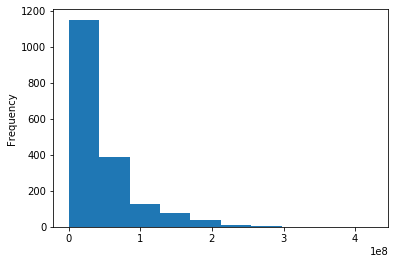

In [52]:
movies_df['budget'].plot(kind = 'hist')

Above we are selecting the column for budget, then plotting and specifying that the type of plot should be a histogram.

We can also get summary statistics for this series of data.

In [44]:
movies_df['domgross_2013$'].describe()

count    1.776000e+03
mean     9.517478e+07
std      1.259653e+08
min      8.990000e+02
25%      2.054659e+07
50%      5.599364e+07
75%      1.216784e+08
max      1.771683e+09
Name: domgross_2013$, dtype: float64

Or if we just wish to look at a single summary statistics, pandas will allow it.

In [70]:
movies_df['domgross_2013$'].mean()/1000000

95.17478357601352

So we see that that the mean domestic gross revenue is 95 million.

Finally, if we wish to see see a histogram of data printed out, we can do so with the value_counts method.  The value counts method will show us the number of times each value occurs.  It can be good for categorical type data, like here, the year.

In [74]:
movies_df.year.value_counts()[:4]

2010    129
2011    124
2009    124
2008    101
Name: year, dtype: int64

Or in percentages.

In [76]:
movies_df.year.value_counts(normalize = True)[:3]

2010    0.071906
2011    0.069119
2009    0.069119
Name: year, dtype: float64

So a total of twenty percent of the movies in our dataset were in 2010, 2011, and 2009.  Even though our dataset covers 43 years.

In [84]:
movies_df.year.max() - movies_df.year.min()

43

### Summary

In this lesson, we learned some basic methods for exploring data.